In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
df = pd.read_csv("../data/falls_after_step1.csv", delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39985 entries, 0 to 39984
Data columns (total 44 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   fallen                                            39985 non-null  bool  
 1   age                                               39985 non-null  int64 
 2   procedure                                         39985 non-null  object
 3   diagnosis                                         39985 non-null  object
 4   c_zriserh1                                        39985 non-null  bool  
 5   decubitus-at_the_moment                           39985 non-null  bool  
 6   bed_mobility-impairment                           39985 non-null  bool  
 7   bed_mobility-jones                                39985 non-null  int64 
 8   bed_mobility-skin_condition                       39985 non-null  bool  
 9   transfer-impairment         

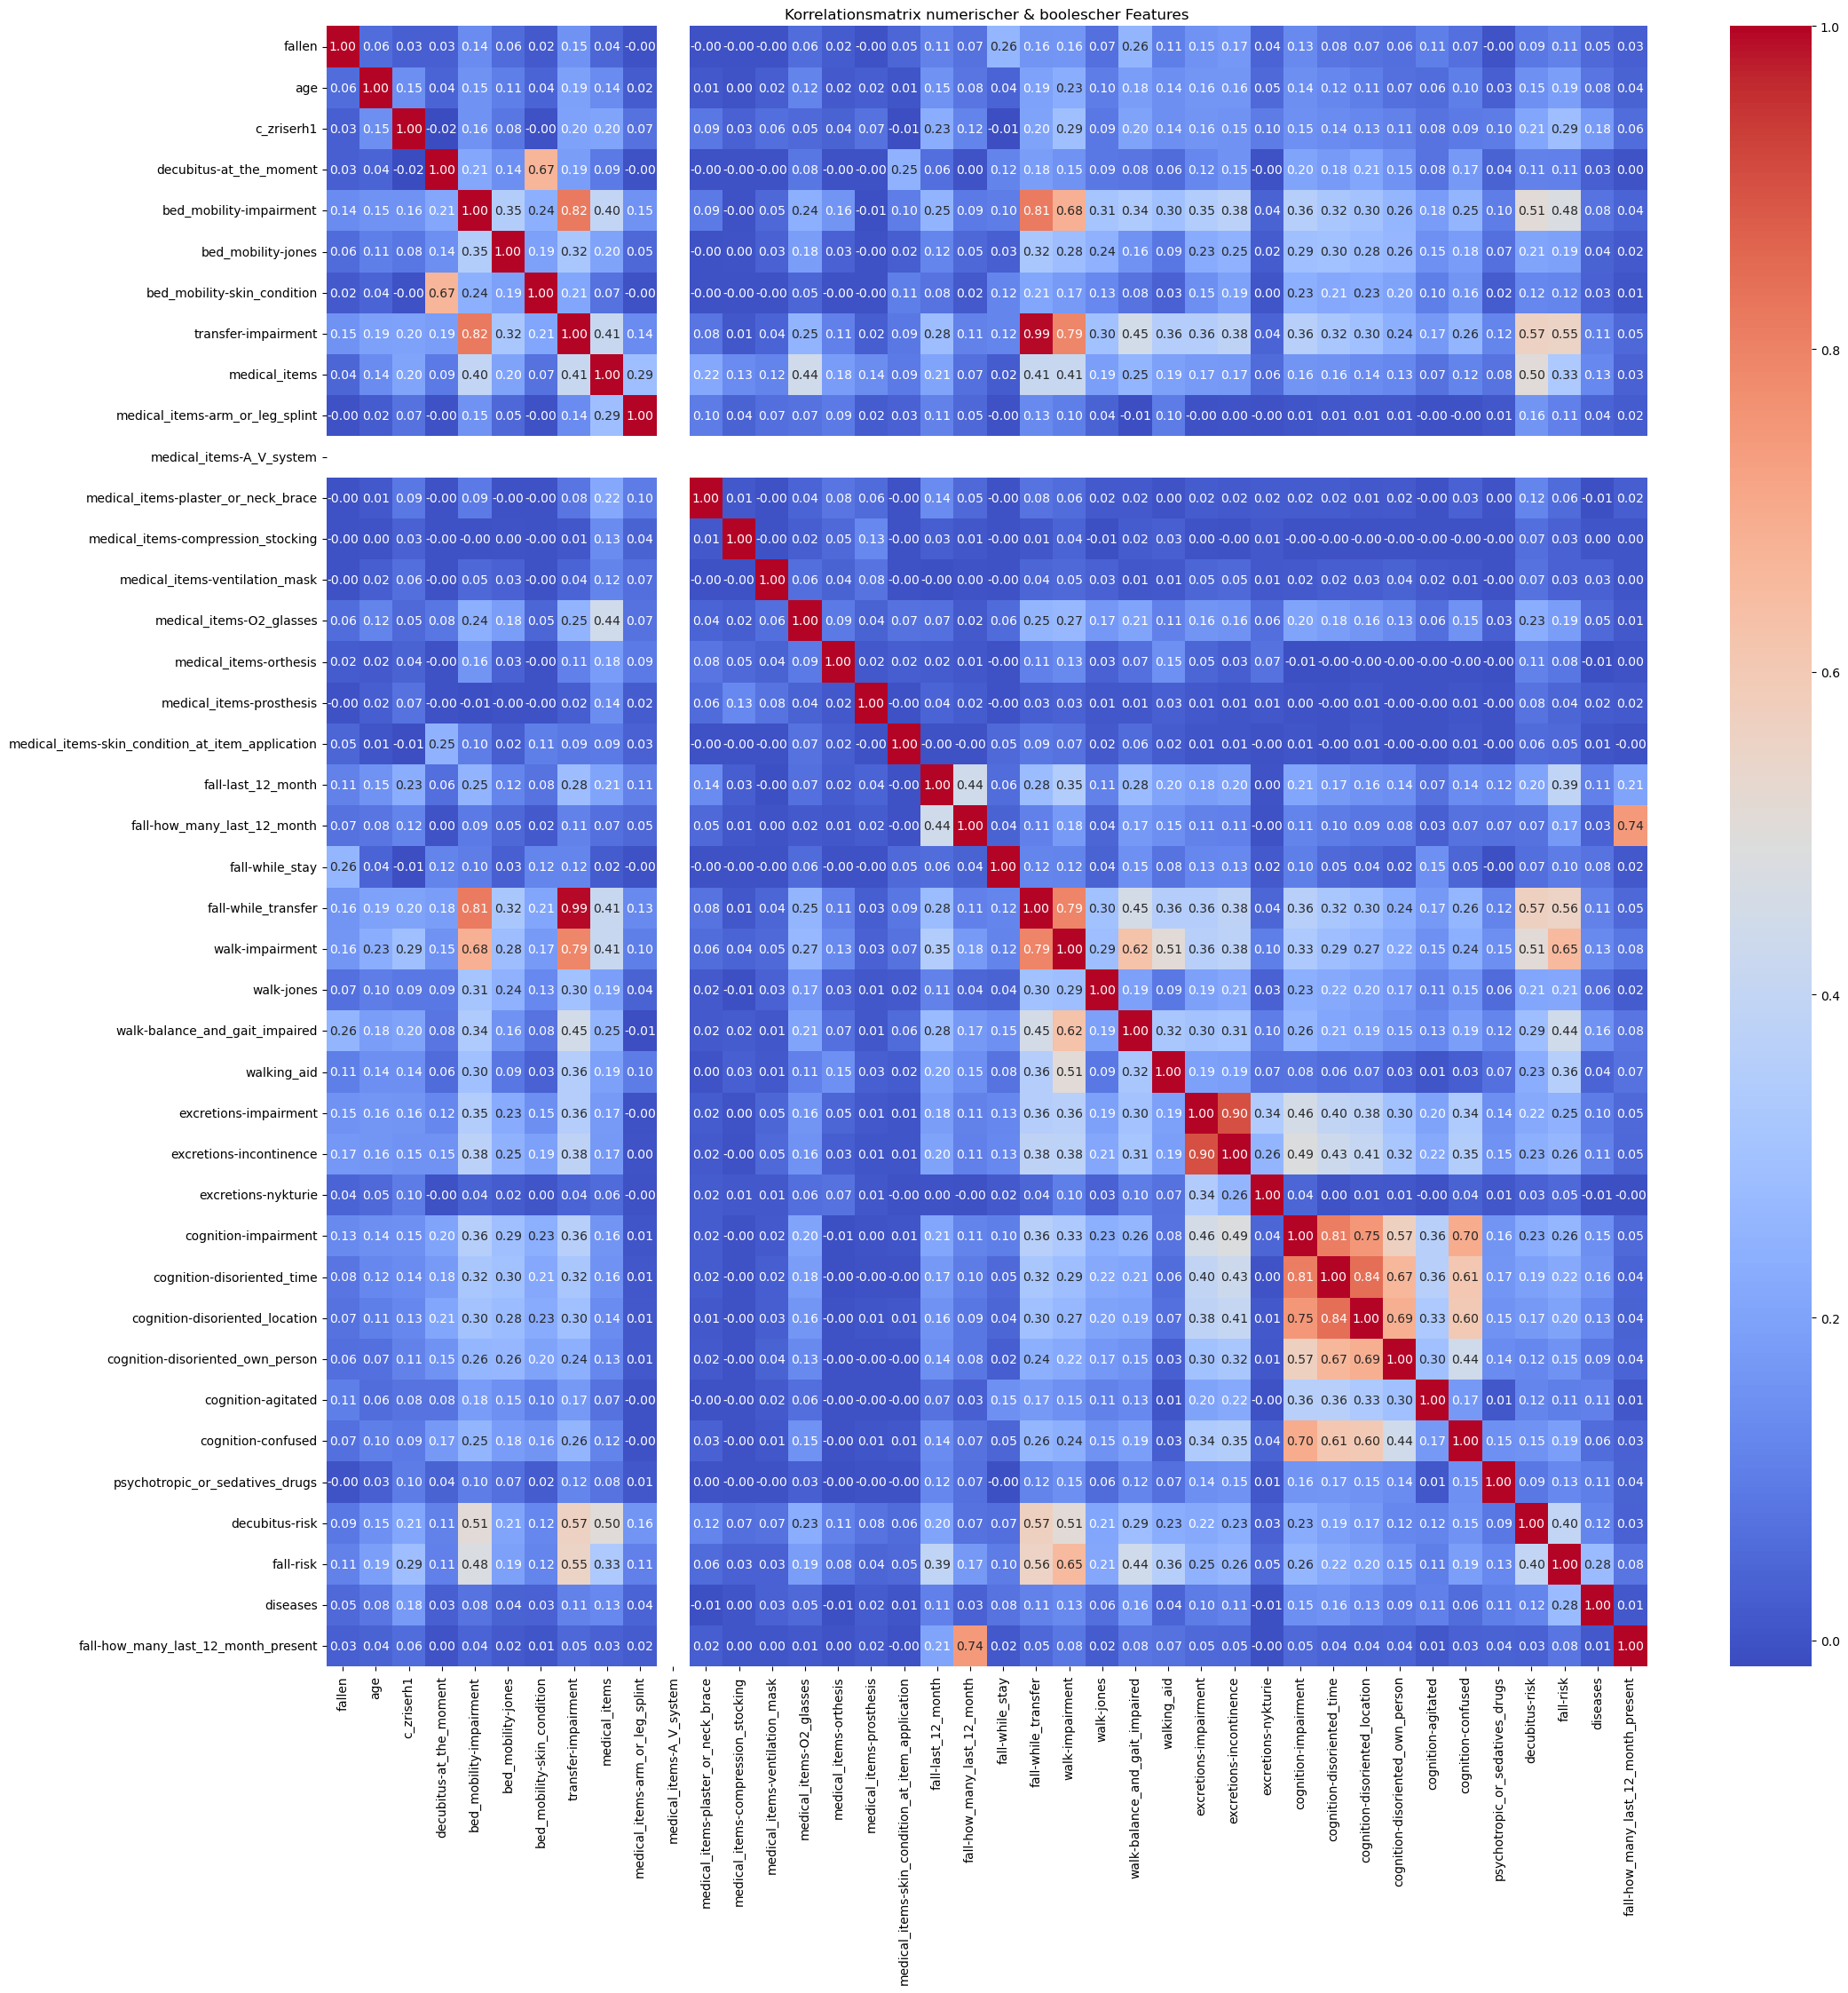

Korrelation mit 'fallen':
fall-while_stay                                     0.259268
walk-balance_and_gait_impaired                      0.255315
excretions-incontinence                             0.167692
walk-impairment                                     0.163476
fall-while_transfer                                 0.159998
transfer-impairment                                 0.154560
excretions-impairment                               0.151549
bed_mobility-impairment                             0.135701
cognition-impairment                                0.132753
fall-risk                                           0.114449
fall-last_12_month                                  0.111641
cognition-agitated                                  0.106055
walking_aid                                         0.105638
decubitus-risk                                      0.087747
cognition-disoriented_time                          0.079942
fall-how_many_last_12_month                         0.07165

In [51]:
# Zielvariable und Bool-Spalten in numerisch umwandeln
df_corr = df.copy()
df_corr['fallen'] = df_corr['fallen'].astype(int)
for col in df_corr.select_dtypes(include='bool').columns:
    df_corr[col] = df_corr[col].astype(int)

# Alle numerischen Spalten (inkl. ehemals bool) auswählen
numeric_cols = df_corr.select_dtypes(include='number').columns.tolist()
corr_matrix = df_corr[numeric_cols].corr()

# Heatmap der Korrelationen
n = len(numeric_cols)
plt.figure(figsize=(max(12, n * 0.6), max(8, n * 0.6)))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix numerischer & boolescher Features")
plt.show()

# Korrelation mit Zielvariable
target_corr = corr_matrix['fallen'].drop('fallen').sort_values(key=abs, ascending=False)
print("Korrelation mit 'fallen':")
print(target_corr)


In [ ]:
fallen korreliert am stärksten mit fall_while-stay und walk-balance_and_gait_impaired.
fall_while-stay wiederum korreliert am stärksten mit walk-balance_and_gait_impaired und cognition-agitated
walk-balance_and_gait_impaired wiederum korreliert am stärksten mit walk-impairment, fall-while_transfer, transfer-impairment, fall-risk und bed_mobility

Die Korrelationsmatrix zeigt, wie stark numerische Variablen miteinander zusammenhängen. Werte nahe +1 oder -1 bedeuten eine starke lineare Beziehung, während Werte nahe 0 auf keine lineare Korrelation hindeuten.
Besonders interessant: Korrelationen der Features mit der Zielvariable fallen, da sie Hinweise auf potenziell relevante Prädiktoren geben.

In [44]:
df_groupmeans = df.copy()
df_groupmeans.drop('age', axis=1, inplace=True)

# Aktuelle numerische Spaltenliste
for col in df_groupmeans.select_dtypes(include='bool').columns:
    df_groupmeans[col] = df_groupmeans[col].astype(int)

numeric_cols = df_groupmeans.select_dtypes(include='number').columns.tolist()

# Gruppierte Mittelwerte
group_means = df_groupmeans.groupby('fallen')[numeric_cols].mean().T

# Dynamisch nach Spalte != 0 sortieren (also z. B. nach '1.0')
sort_col = [col for col in group_means.columns if col != 0][0]
group_means_sorted = group_means.sort_values(by=sort_col, ascending=False)

print("Mittelwerte der Features nach 'fallen':")
display(group_means_sorted)


Mittelwerte der Features nach 'fallen':


fallen,0,1
fallen,0.000000,1.000000
fall-risk,-0.594119,1.000000
walk-balance_and_gait_impaired,0.032614,1.000000
walk-impairment,0.078865,1.000000
fall-while_transfer,0.057833,0.840426
transfer-impairment,0.057131,0.808511
walk-jones,-0.669023,0.744681
fall-how_many_last_12_month,0.058685,0.691489
bed_mobility-impairment,0.044070,0.627660
decubitus-risk,-0.630518,0.563830


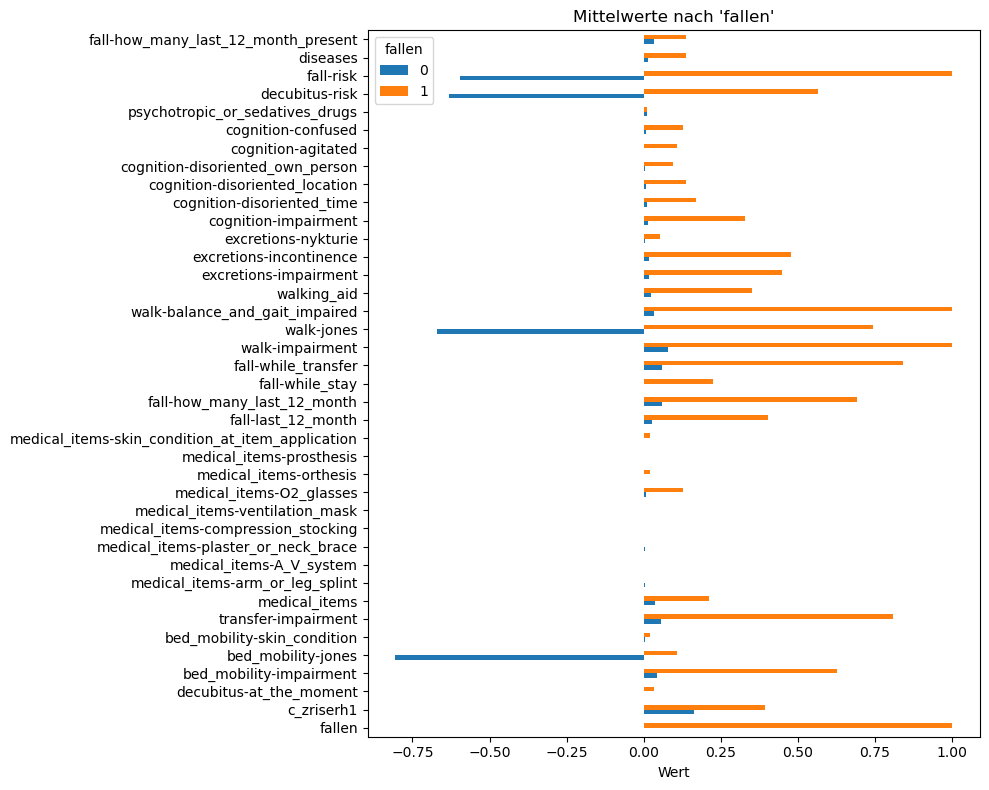

In [45]:
# Visualisierung der größten Unterschiede
group_means.plot(kind='barh', figsize=(10, 8))
plt.title("Mittelwerte nach 'fallen'")
plt.xlabel("Wert")
plt.tight_layout()
plt.show()

Die gruppierten Mittelwerte (group_means) zeigen, wie sich der Durchschnittswert numerischer Merkmale zwischen Patientengruppen mit fallen = 0 und fallen = 1 unterscheidet.
Große Unterschiede deuten darauf hin, dass das jeweilige Feature mit dem Sturzrisiko zusammenhängen könnte.

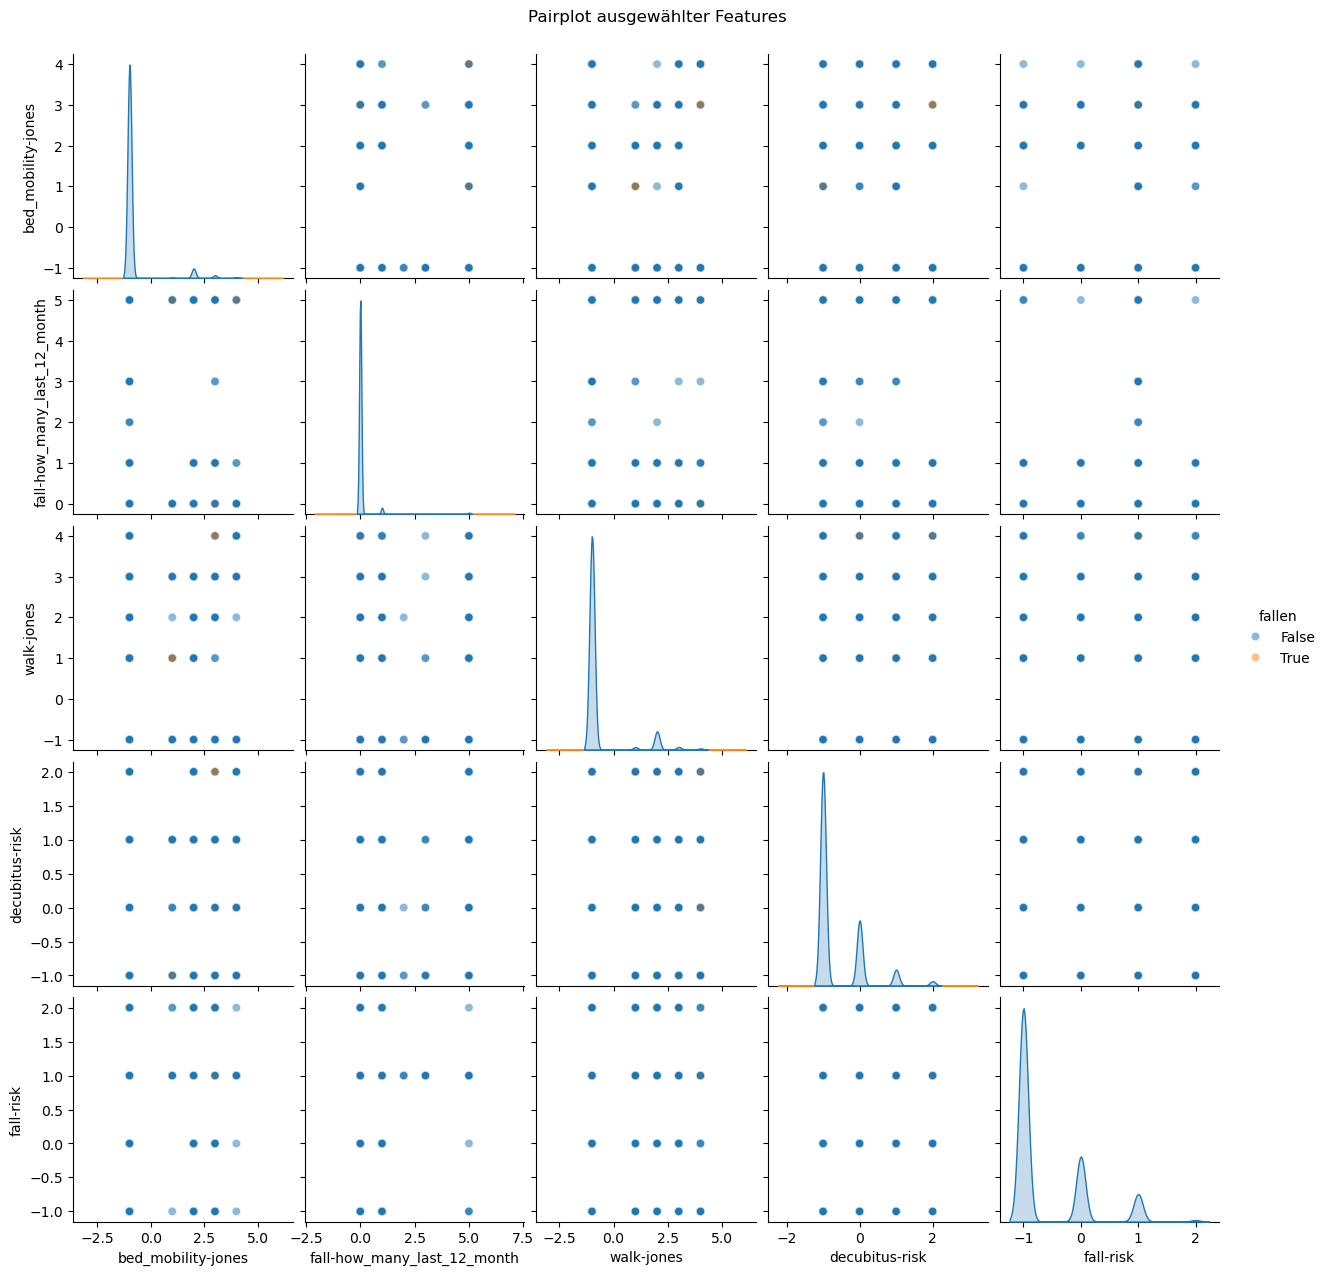

In [35]:
# 5. Scatterplot Matrix für ausgewählte Features
selected_cols = numeric_cols[:5]  # oder gezielt Features mit hoher Korrelation wählen
sns.pairplot(df, vars=selected_cols, hue='fallen', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot ausgewählter Features", y=1.02)
plt.show()

Diese Analyse zeigt, welche Ausprägungen kategorialer Variablen besonders häufig bei gestürzten Patienten vorkommen.
Das kann helfen, kritische Merkmalskombinationen oder Risikoprofile besser zu verstehen, z. B. häufige Diagnosen, Wohnsituation oder Geschlecht.

Pairplots ermöglichen eine visuelle Prüfung von Zusammenhängen und Clustern zwischen ausgewählten numerischen Variablen – farblich getrennt nach fallen.
So lassen sich Muster erkennen, z. B. ob sich gestürzte und nicht gestürzte Patienten in bestimmten Merkmalskombinationen visuell unterscheiden lassen.

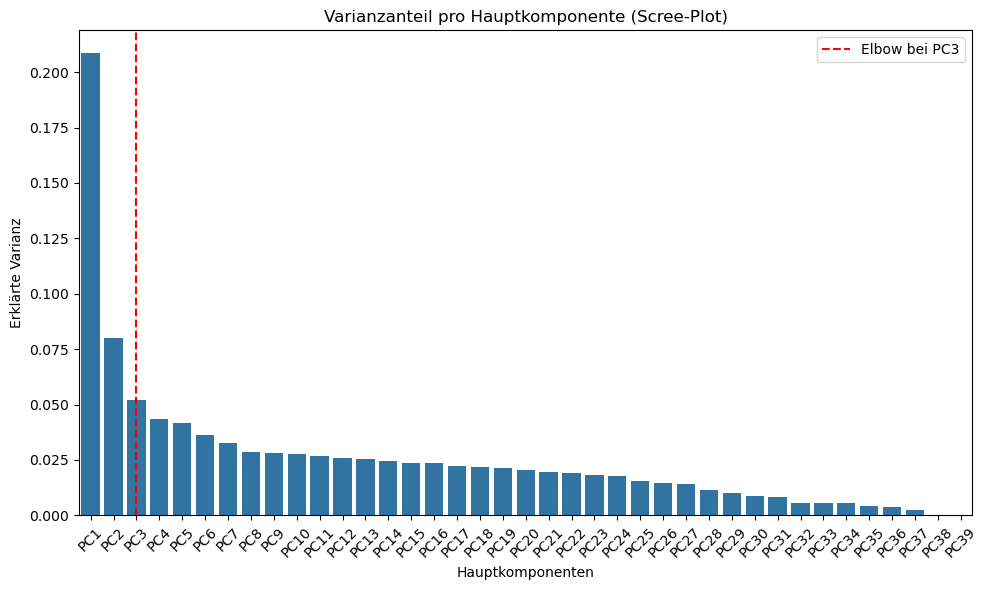

🔹 Elbow gefunden bei Komponente: 3 (Differenzmethode)


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Datenvorbereitung
df_pca = df.copy()
df_pca['fallen'] = df_pca['fallen'].astype(int)
for col in df_pca.select_dtypes(include='bool').columns:
    df_pca[col] = df_pca[col].astype(int)

target = df_pca['fallen']
features = df_pca.drop(columns=['fallen'])
features = features.select_dtypes(include='number')

# 2. Standardisierung
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 3. PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# 4. Differenzmethode: Zuwachs < 1%
first_diff = np.diff(cumulative_var)
threshold = 0.05
elbow_idx = np.argmax(first_diff < threshold) + 1 if any(first_diff < threshold) else None

# 5. Scree-Plot mit Elbow-Point
plt.figure(figsize=(10, 6))
sns.barplot(x=[f"PC{i+1}" for i in range(len(explained_var))], y=explained_var)

if elbow_idx:
    plt.axvline(x=elbow_idx - 1, color='red', linestyle='--', label=f"Elbow bei PC{elbow_idx}")
    plt.legend()

plt.title("Varianzanteil pro Hauptkomponente (Scree-Plot)")
plt.ylabel("Erklärte Varianz")
plt.xlabel("Hauptkomponenten")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Ausgabe des Ergebnisses
print(f"🔹 Elbow gefunden bei Komponente: {elbow_idx if elbow_idx else 'nicht eindeutig'} (Differenzmethode)")


In [18]:
import numpy as np
import pandas as pd

# Komponentenmatrix (n_components x n_features)
loadings = pd.DataFrame(
    pca.components_,
    columns=features.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Top-N Features je Komponente
top_n = 5

for pc in loadings.index:
    print(f"\n🔹 {pc} – wichtigste Features:")
    top_features = loadings.loc[pc].abs().sort_values(ascending=False).head(top_n)
    print(top_features)



🔹 PC1 – wichtigste Features:
fall-while_transfer        0.287449
transfer-impairment        0.287347
walk-impairment            0.282862
bed_mobility-impairment    0.268111
cognition-impairment       0.243984
Name: PC1, dtype: float64

🔹 PC2 – wichtigste Features:
cognition-disoriented_location      0.350654
cognition-disoriented_time          0.346585
cognition-impairment                0.317136
cognition-disoriented_own_person    0.305538
cognition-confused                  0.285561
Name: PC2, dtype: float64

🔹 PC3 – wichtigste Features:
fall-how_many_last_12_month            0.566163
fall-how_many_last_12_month_present    0.516195
fall-last_12_month                     0.327663
decubitus-at_the_moment                0.234092
bed_mobility-skin_condition            0.217588
Name: PC3, dtype: float64

🔹 PC4 – wichtigste Features:
decubitus-at_the_moment                             0.513710
bed_mobility-skin_condition                         0.484619
fall-how_many_last_12_month_present

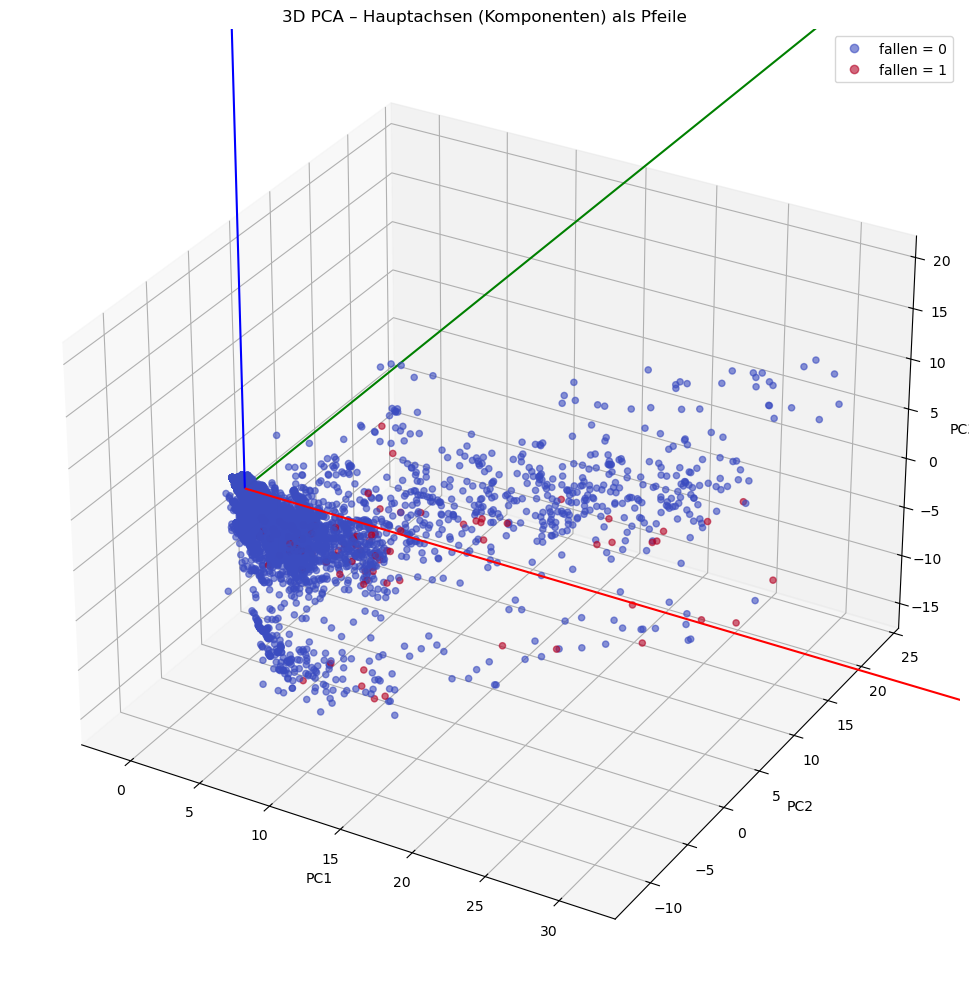

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# 1. PCA-3D-Projektion
pca_df_3d = pd.DataFrame(X_pca[:, :3], columns=["PC1", "PC2", "PC3"])
pca_df_3d["fallen"] = target.values

# 2. Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 3. Scatter-Punkte (Patienten im PCA-Raum)
scatter = ax.scatter(
    pca_df_3d["PC1"],
    pca_df_3d["PC2"],
    pca_df_3d["PC3"],
    c=pca_df_3d["fallen"],
    cmap="coolwarm",
    alpha=0.6
)

# 4. Einheitsvektoren der Hauptkomponenten anzeigen
# PC1: (1,0,0), PC2: (0,1,0), PC3: (0,0,1)
component_labels = ["PC1", "PC2", "PC3"]
colors = ["red", "green", "blue"]
scale = 100

# Pfeile für die 3 Hauptachsen
for i in range(3):
    direction = np.zeros(3)
    direction[i] = 1
    ax.quiver(
        0, 0, 0,
        direction[0] * scale,
        direction[1] * scale,
        direction[2] * scale,
        color=colors[i],
        arrow_length_ratio=0.1
    )
    ax.text(
        direction[0] * scale * 1.1,
        direction[1] * scale * 1.1,
        direction[2] * scale * 1.1,
        component_labels[i],
        color=colors[i],
        fontsize=12
    )

# Achsen
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA – Hauptachsen (Komponenten) als Pfeile")
ax.legend(handles=scatter.legend_elements()[0], labels=['fallen = 0', 'fallen = 1'])

plt.tight_layout()
plt.show()


In [26]:
# PCA dataset with 6 first components
# Wähle z. B. die ersten 6 Hauptkomponenten
n_components = 6
pca_data = pd.DataFrame(X_pca[:, :n_components], columns=[f"PC{i+1}" for i in range(n_components)])

# Zielvariable anhängen
pca_data["fallen"] = target.values

# speichern
pca_data.to_csv("../data/falls_after_PCA.csv", index=False)
